In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [84]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


In [85]:
train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [86]:
test_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [87]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [88]:
train_data.shape

(103904, 25)

In [89]:
test_data.shape

(25976, 25)

In [90]:
train_data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [91]:
test_data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [92]:
train_data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [93]:
train_data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [94]:
train_data.drop(["Unnamed: 0","id"],axis = 1, inplace = True)
test_data.drop(["Unnamed: 0","id"], axis = 1, inplace = True)
#data_set1.drop(["id"],axis=1,inplace =True)

In [95]:
train_data.columns
test_data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [96]:
print(train_data.dtypes, test_data.dtypes)

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [97]:
train_data.select_dtypes(include = ["object"]).columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [98]:
for col in ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']:
    train_data[col ] = train_data[col].astype("category")

In [99]:
for col in ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']:
    test_data[col ] = test_data[col].astype("category")

In [100]:
train_data["satisfaction"].replace({"neutral or dissatisfied" : 0, "satisfied":1}, inplace = True)

In [101]:
test_data["satisfaction"].replace({"neutral or dissatisfied" : 0, "satisfied":1}, inplace = True)

In [102]:
train_data["satisfaction"].unique()
test_data["satisfaction"].unique()

[1, 0]
Categories (2, int64): [0, 1]

In [103]:
train_data["Arrival Delay in Minutes"].fillna(train_data["Arrival Delay in Minutes"].mean(), inplace = True)

In [104]:
test_data["Arrival Delay in Minutes"].fillna(test_data["Arrival Delay in Minutes"].mean(), inplace = True)

In [105]:
categorical_cols = train_data.select_dtypes(include=["category"]).columns
train_data = pd.get_dummies(train_data,columns = categorical_cols , drop_first = True)
print(train_data)

        Age  Flight Distance  Inflight wifi service  \
0        13              460                      3   
1        25              235                      3   
2        26             1142                      2   
3        25              562                      2   
4        61              214                      3   
...     ...              ...                    ...   
103899   23              192                      2   
103900   49             2347                      4   
103901   30             1995                      1   
103902   22             1000                      1   
103903   27             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       2                       3   
2                                       2                       2   
3                                       5                      

In [57]:
categorical_cols2 = test_data.select_dtypes(include=["category"]).columns
test_data = pd.get_dummies(test_data,columns = categorical_cols2 , drop_first = True)
print(test_data)

       Age  Flight Distance  Inflight wifi service  \
0       52              160                      5   
1       36             2863                      1   
2       20              192                      2   
3       44             3377                      0   
4       49             1182                      2   
...    ...              ...                    ...   
25971   34              526                      3   
25972   23              646                      4   
25973   17              828                      2   
25974   14             1127                      3   
25975   42              264                      2   

       Departure/Arrival time convenient  Ease of Online booking  \
0                                      4                       3   
1                                      1                       3   
2                                      0                       2   
3                                      0                       0   
4          

<Axes: >

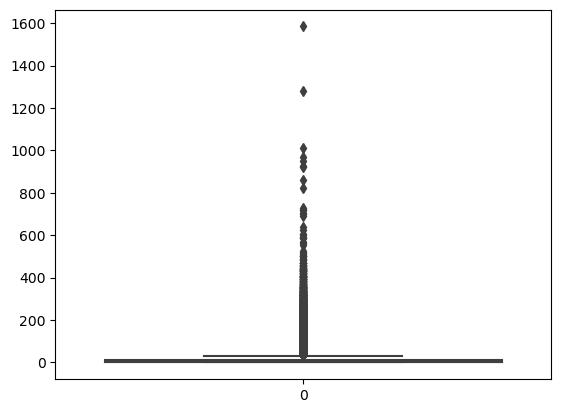

In [106]:
sns.boxplot(train_data["Arrival Delay in Minutes"])

<Axes: >

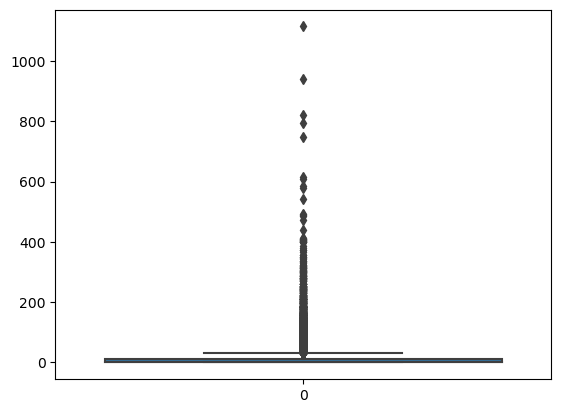

In [107]:
sns.boxplot(test_data["Arrival Delay in Minutes"])

In [108]:
from matplotlib.patches import Patch

In [ ]:
sns.countplot(x="Gender", hue="Class",data = train_data,palette ="viridis")
plt.title("Gender Vs Class")
plt.legend(title= "Class",loc = "best",facecolor ="skyblue")


plt.show()

In [ ]:
sns.countplot(x="Gender", hue="Class",data = test_data,palette ="Set2")
plt.title("Gender Vs Class")
plt.legend(title= "Class",loc = "best",facecolor ="skyblue")


plt.show()

In [ ]:
sns.catplot(x="Gender", hue="Class",col ="satisfaction",data = train_data,palette ="dark",height = 5,aspect =0.5)
plt.suptitle("Gender Vs Class", y = 1)
#plt.legend(title= "satisfaction",loc = "best",facecolor ="white")
plt.legend()

plt.show()

In [58]:
x= train_data.drop(["satisfaction_1"], axis =1)
y = train_data["satisfaction_1"]


In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 7)

In [61]:
clf = RandomForestClassifier(n_estimators=100,max_depth=100)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=100)

In [28]:
''''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)'''''

In [62]:
clf.feature_importances_


array([0.03072898, 0.03985524, 0.1498954 , 0.01700361, 0.03641222,
       0.01671348, 0.01244844, 0.17546654, 0.04384052, 0.05980585,
       0.02882963, 0.03468923, 0.02472097, 0.02431497, 0.02378321,
       0.03153964, 0.01170736, 0.01280916, 0.00464128, 0.03603001,
       0.10515268, 0.07421238, 0.00539922])

In [70]:
features = train_data.columns
importance = clf.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([train_data.columns[indices], np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,Online boarding,Inflight wifi service,Type of Travel_Personal Travel,Class_Eco,Inflight entertainment,Seat comfort,Flight Distance,Ease of Online booking,Customer Type_disloyal Customer,Leg room service,...,Baggage handling,Checkin service,Inflight service,Departure/Arrival time convenient,Gate location,Arrival Delay in Minutes,Food and drink,Departure Delay in Minutes,Class_Eco Plus,Gender_Male
1,0.175467,0.149895,0.105153,0.074212,0.059806,0.043841,0.039855,0.036412,0.03603,0.034689,...,0.024721,0.024315,0.023783,0.017004,0.016713,0.012809,0.012448,0.011707,0.005399,0.004641


In [68]:
features = train_data.columns
importances = clf.feature_importances_
indices = np.argsort(importances)
pd.DataFrame([train_data.columns[indices],np.sort(importances)])

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,Gender_Male,Class_Eco Plus,Departure Delay in Minutes,Food and drink,Arrival Delay in Minutes,Gate location,Departure/Arrival time convenient,Inflight service,Checkin service,Baggage handling,...,Leg room service,Customer Type_disloyal Customer,Ease of Online booking,Flight Distance,Seat comfort,Inflight entertainment,Class_Eco,Type of Travel_Personal Travel,Inflight wifi service,Online boarding
1,0.004641,0.005399,0.011707,0.012448,0.012809,0.016713,0.017004,0.023783,0.024315,0.024721,...,0.034689,0.03603,0.036412,0.039855,0.043841,0.059806,0.074212,0.105153,0.149895,0.175467


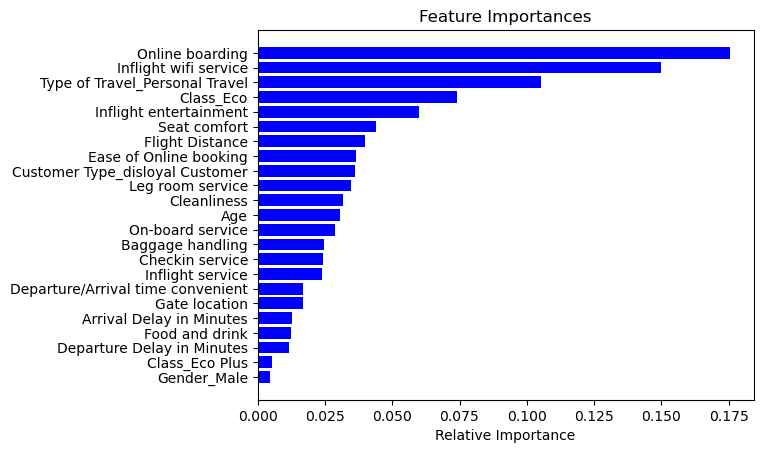

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], color='black')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

y_pred = clf.predict(x_train)
print("Accuracy for Train set:")
print(accuracy_score(y_train,y_pred))

y_pred_test = clf.predict(x_test)
print("Accuracy for Test set:")
print(accuracy_score(y_test,y_pred_test))

print("\n")

print("Recall for Train set:")
print(recall_score(y_train,y_pred,pos_label=1))

print("Recall for Test set:")
print(recall_score(y_test,y_pred_test,pos_label=1))

print("\n")

print("Precision for Train set:")
print(precision_score(y_train,y_pred,pos_label=1))

print("Precision for Test set:")
print(precision_score(y_test,y_pred_test,pos_label=1))


Accuracy for Train set:
1.0
Accuracy for Test set:
0.9625946362119852


Recall for Train set:
1.0
Recall for Test set:
0.9419421640411212


Precision for Train set:
1.0
Precision for Test set:
0.970953724174735


In [72]:
# Evaluate the model
from sklearn.metrics import confusion_matrix , classification_report
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9625946362119852

Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.98      0.97     17651
        True       0.97      0.94      0.96     13521

    accuracy                           0.96     31172
   macro avg       0.96      0.96      0.96     31172
weighted avg       0.96      0.96      0.96     31172


Confusion Matrix:
[[17270   381]
 [  785 12736]]


In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [2,3,5,7],
           "min_samples_leaf" : [2, 4]}

scores = ['precision', 'recall']

In [74]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print("\n")

    clf = GridSearchCV(estimator=rfc, param_grid=param_grid,cv=5,
                       scoring='%s_macro' % score)
    clf.fit(x_train, y_train)

    print("Best parameters set found on training set:")
    print("\n")
    print(clf.best_params_)
    print("\n")
    
    print("Grid scores on training set:")
    print("\n")
    means = clf.cv_results_['mean_test_score']
    for mean, params in zip(means, clf.cv_results_['params']):
        print("%0.3f for %r"
              % (mean, params), score)


# Tuning hyper-parameters for precision


Best parameters set found on training set:


{'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 54}


Grid scores on training set:


0.856 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 9} precision
0.872 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 18} precision
0.867 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 27} precision
0.874 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 36} precision
0.878 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 45} precision
0.877 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 54} precision
0.872 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 63} precision
0.854 for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 9} precision
0.869 for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 18} precision
0.876 for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 27} precision
0.877 for {'max_depth'

In [77]:
print(clf.best_score_, clf.best_params_)

0.9298994099815714 {'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 54}


In [78]:
y_pred_test=clf.predict(x_test)
print(accuracy_score(y_test,y_pred_test))

0.9348453740536379


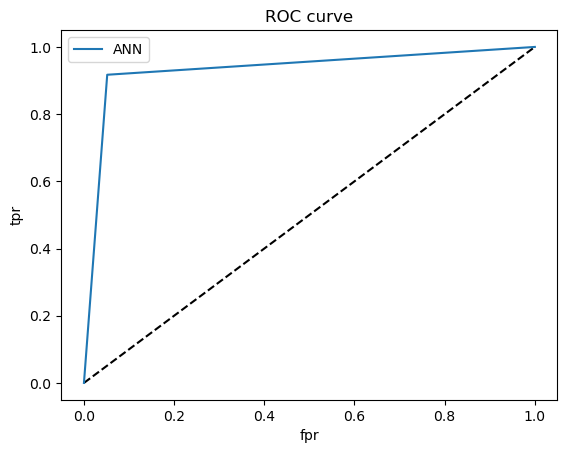

In [81]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = clf.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
#plt.text(0, 1, '[0,1]', ha='right', va='bottom')
#plt.text(1, 1, '[1,1]', ha='right', va='bottom')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.legend()
plt.show()

In [82]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9327770417001908